In [1]:
from gan import GANTrainer

/home/mgfos207/anaconda3/envs/micahTestGAN/lib/python3.10/site-packages/torch/nn/modules/transformer.py:20: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:84.)
  device: torch.device = torch.device(torch._C._get_default_device()),  # torch.device('cpu'),


ModuleNotFoundError: No module named 'numpy'

In [2]:
new_gan = GANTrainer()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [3]:
new_gan.fit_model()

/home/mgfos207/anaconda3/envs/micahTestGAN/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2023-12-19 20:25:02.856387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 20:25:02.980721: W tensorflow/stream_executor/platform/default/dso_load

Epoch 299: 100%|██████████| 430/430 [00:07<00:00, 57.69it/s, v_num=3]

`Trainer.fit` stopped: `max_epochs=300` reached.


Epoch 299: 100%|██████████| 430/430 [00:07<00:00, 57.42it/s, v_num=3]


In [4]:
import matplotlib.pyplot as plt

In [5]:
validation_samp = new_gan.model.validation_z.type_as(new_gan.model.generator.lin1.weight)
sample_imgs = new_gan.model(validation_samp).cpu()

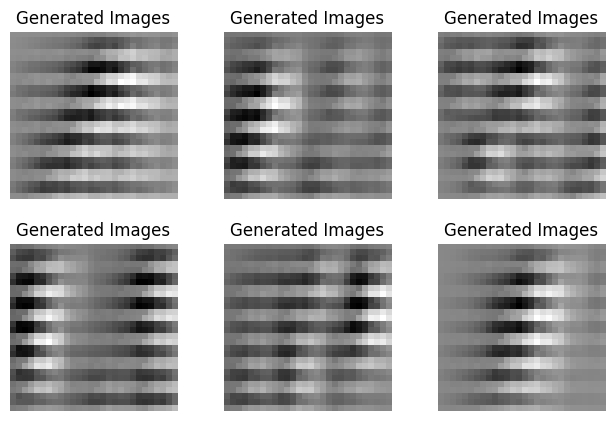

In [6]:
fig = plt.figure()
for i in range(sample_imgs.size(0)):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(sample_imgs.detach()[i, 0, :, :], cmap='gray_r', interpolation='none')
    plt.title("Generated Images")
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
plt.show()

### Data Loader Test

Let's test the data loader we created

In [2]:
# ! python -m pip install numpy

  Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.0.0 requires jsonschema>=3.0, which is not installed.
diffusers 0.16.1 requires importlib-metadata, which is not installed.
gradio 3.32.0 requires matplotlib, which is not installed.
scikit-surprise 1.1.2 requires joblib>=1.0.0, which is not installed.
scikit-surprise 1.1.2 requires scipy>=1.3.2, which is not installed.
tensorflow 2.10.0 requires h5py>=2.9.0, which is not installed.
tensorflow-datasets 4.9.0 requires click, which is not installed.
tensorflow-datasets 4.9.0 requires toml, which is not installed.
tensorflow-object-detection-api 0.1.1 requires Cython>=0.28.1, which is not installed.
tensorflow-ob

In [4]:
# ! python -m pip install matplotlib

  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (310 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-object-detection-api 0.1.1 requires Cython>=0.28.1, which is not installed.
tensorflow-object-detection-api 0.1.1 requires lxml, which is not installed.


In [8]:
# ! python -m pip install opendatasets --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nltk 3.7 requires joblib, which is not installed.
tensorflow-datasets 4.9.0 requires toml, which is not installed.


In [1]:
from dataloader_new import AnimeDataLoader, AnimeGAN

In [2]:
data_dir = "/home/mgfos207/Desktop/PetProjects/DLDataPreproccessing/test_faces_split/train"
anime_data_loader = AnimeDataLoader((120,120), 128, data_dir)

In [3]:
gan = AnimeGAN(anime_data_loader)

In [4]:
import torch

In [5]:
xb = torch.randn(128, 128, 1, 1) #

In [6]:
fake_imgs = gan.generator(xb)

In [7]:
print(fake_imgs.shape)

torch.Size([128, 3, 64, 64])


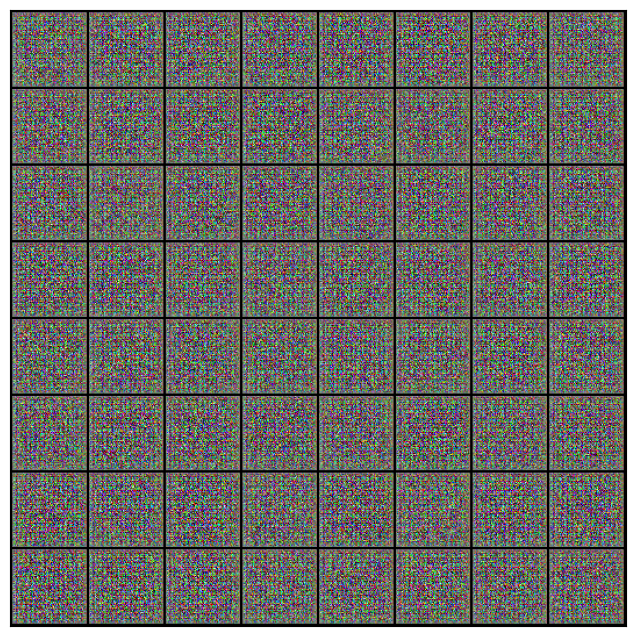

In [8]:
gan.show_images(fake_imgs)

In [7]:
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/